In [70]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('../data/medical_cost.csv')
df

In [ ]:
df.describe()

In [ ]:
df['sex'].value_counts()

In [ ]:
df['smoker'].value_counts()

In [ ]:
df['region'].value_counts()

In [ ]:
df['children'].value_counts()

In [ ]:
df.info()

In [ ]:
# 수치형 - 히스토그램
import seaborn as sns

sns.histplot(df['age'], kde=True)

In [ ]:
sns.boxplot(df['age'])

In [ ]:
sns.histplot(df['bmi'], kde=True)

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:
sns.kdeplot(df['children'])

In [ ]:
# 이변량 - 종속변수(수치형)/독립변수(수치/범주형)
# 독(수) - 종(수) : 산점도, 상관관계 분석
# 독(범) - 종(수) : 막대그래프(평균비교), T검정(2개), F검정(3개이상)

In [ ]:
df.columns

In [ ]:
sns.pairplot(df, hue='region')

In [ ]:
df.corr(numeric_only=True)

In [ ]:
df[df['smoker'] == 'yes'].corr(numeric_only=True)

In [ ]:
df[df['smoker'] == 'no'].corr(numeric_only=True)

In [ ]:
sns.barplot(data=df, x = 'sex', y = 'charges')

In [ ]:
sns.barplot(data=df, x = 'smoker', y = 'charges')

In [ ]:
sns.barplot(data=df, x = 'region', y = 'charges', estimator='var')

In [ ]:
sns.barplot(data=df, x = 'children', y = 'charges')

In [13]:
# df['children']
def children(x):
    if (x == 0) or (x == 1):
        return x
    else:
        return 2

df['child'] = df['children'].apply(children)

<Axes: xlabel='child', ylabel='charges'>

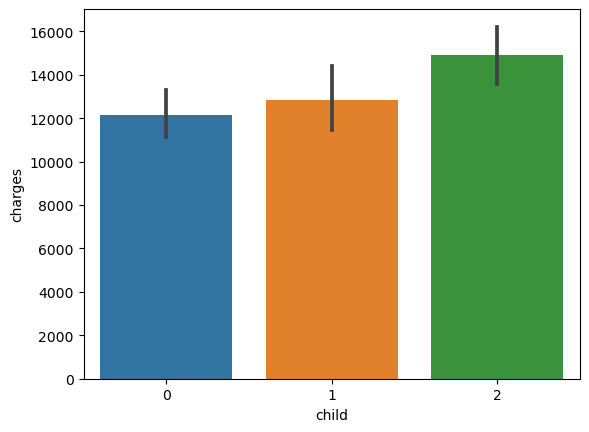

In [14]:
sns.barplot(data=df, x = 'child', y = 'charges')

In [15]:
# 성별 - 비용 : 정규성, 등분산성
from scipy import stats

s0 = df[df['sex'] == 'female']['charges']
s1 = df[df['sex'] == 'male']['charges']

print(stats.shapiro(s0))
print(stats.shapiro(s1))

ShapiroResult(statistic=0.7998431921005249, pvalue=4.942751968777452e-25)
ShapiroResult(statistic=0.8188881278038025, pvalue=3.2090206869839427e-24)


In [16]:
# 두 집단 모두 정규성을 가지지 않으므로 비모수 검정(맨휘트니유검정) 시행
stats.mannwhitneyu(s0, s1)

MannwhitneyuResult(statistic=145437.0, pvalue=0.6430774634896359)

In [ ]:
stats.ttest_ind(s0, s1)

In [ ]:
# 흡연여부 - 비용 : 정규성, 등분산성

s0 = df[df['smoker'] == 'yes']['charges']
s1 = df[df['smoker'] == 'no']['charges']

print(stats.shapiro(s0))
print(stats.shapiro(s1))

In [ ]:
# 두 집단 모두 정규성을 가지지 않으므로 비모수 검정(맨휘트니유검정) 시행
stats.mannwhitneyu(s0, s1)

In [ ]:
stats.ttest_ind(s0, s1)

In [ ]:
# 지역 - 비용 : 정규성, 등분산성

r0 = df[df['region'] == 'southwest']['charges']
r1 = df[df['region'] == 'southeast']['charges']
r2 = df[df['region'] == 'northwest']['charges']
r3 = df[df['region'] == 'northeast']['charges']

print(stats.shapiro(r0))
print(stats.shapiro(r1))
print(stats.shapiro(r2))
print(stats.shapiro(r3))

In [ ]:
# 정규성을 가지지 않으므로 비모수검정(크러스컬-월리스 검정)
stats.kruskal(r0, r1, r2, r3)

In [ ]:
stats.f_oneway(r0, r1, r2, r3)

In [ ]:
# 자녀수 - 비용 : 정규성, 등분산성

c0 = df[df['child'] == 0]['charges']
c1 = df[df['child'] == 1]['charges']
c2 = df[df['child'] == 2]['charges']

print(stats.shapiro(c0))
print(stats.shapiro(c1))
print(stats.shapiro(c2))

In [ ]:
# 정규성을 가지지 않으므로 비모수 검정
stats.kruskal(c0, c1, c2)

In [ ]:
df.columns

In [ ]:
# age - 연관성 0.3 / smoker 연관지어서 높은 연관성 가진다.
# sex - 연관성 X : 제외
# bmi - 연관성 0.2 / smoker 연관지어서 높은 연관성 가진다.
# children - 수치형으로 봤을때는 연관성x, 범주형으로 했을때도 연관성 X : 제외
# child - children을 범주형(0,1,2) 묶어서 확인 > 연관성 o
# smoker - 강한 연관성이 있다.
# region - 연관성 X : 제외

In [17]:
# 독립변수 / 종속변수 나누기
X = df[['age', 'bmi', 'child', 'smoker']]
y = df['charges']

In [18]:
# 다중공선성 - 각 독립변수들끼리 연관성이 있는지(독립적인지)
# 모든 독립변수 - 숫자

X = pd.get_dummies(X).astype('float')

In [ ]:
X.head(1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variance_inflation_factor(X,3)

25.70398885753926

In [20]:
# 회귀 분석
# 데이터 전처리 > 모델 선택 > 학습 > 예측 > 평가
# 데이터전처리 - 인코딩 완료, 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
age_bmi = scaler.fit_transform(X[['age', 'bmi']])
X[['age', 'bmi']] = age_bmi
X.head()

,age,bmi,child,smoker_no,smoker_yes
0,1.745186,1.407897,0.0,1.0,0.0
1,0.551453,-0.477635,0.0,0.0,1.0
2,0.902551,0.419223,2.0,1.0,0.0
3,-0.431621,-1.411383,1.0,1.0,0.0
4,-0.642279,0.107700,1.0,1.0,0.0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(856, 5) (214, 5) (856,) (214,)


In [22]:
# 회귀 알고리즘
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [23]:
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0)
rf_reg = RandomForestRegressor(random_state=0)
xgb_reg = XGBRegressor(random_state=0)

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr_reg, X_train, y_train, 
                        scoring='neg_root_mean_squared_error', cv=5)
print(np.mean(scores * -1))

6224.6981055932965


In [25]:
scores = cross_val_score(dt_reg, X_train, y_train, 
                        scoring='neg_root_mean_squared_error', cv=5)
print(np.mean(scores * -1))

6618.854138957853


In [26]:
scores = cross_val_score(rf_reg, X_train, y_train, 
                        scoring='neg_root_mean_squared_error', cv=5)
print(np.mean(scores * -1))

5243.844733834735


In [27]:
scores = cross_val_score(xgb_reg, X_train, y_train, 
                        scoring='neg_root_mean_squared_error', cv=5)
print(np.mean(scores * -1))

5496.376118266452


In [ ]:
# linearRegression과 RandomForestRegressor 를 사용하기로 함

# linearRegression 모델을 향상 시킬수 있는 방법
# 1. 다항회귀, 2.규제, 3.sgd

# RandomForestRegressor 모델을 향상 시킬수 있는 방법
# 1. 하이퍼파라미터 튜닝

In [28]:
# 다항회귀 - 2차
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

In [29]:
# 학습
lr_reg = LinearRegression()
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2679.9182252803744
MSE : 18339210.73155652
RMSE : 4282.43047013685
R2 : 0.8711167289523534


In [30]:
# 다항회귀 - 3차
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = LinearRegression()
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2812.089557523365
MSE : 19096352.008322008
RMSE : 4369.937300273541
R2 : 0.865795734182016


In [ ]:
# 다항회귀 - 4차
poly = PolynomialFeatures(degree = 4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = LinearRegression()
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolut(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

In [31]:
# 다항회귀 - 3차 - Ridge, alpha = 1
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = Ridge()
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2763.1978967736027
MSE : 18995382.385395285
RMSE : 4358.369234632982
R2 : 0.8665053228044343


In [32]:
# 다항회귀 - 3차 - Ridge, alpha = 10
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = Ridge(alpha=10)
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2784.191009470747
MSE : 18714936.92078769
RMSE : 4326.07638869076
R2 : 0.8684762216265363


In [33]:
# 다항회귀 - 2차 - Ridge, alpha = 10
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = Ridge(alpha=10)
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2722.512135942347
MSE : 18243144.174173307
RMSE : 4271.199383565851
R2 : 0.8717918600872244


In [ ]:
# 다항회귀 - 2차 - Ridge, alpha = 5
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = Ridge(alpha=5)
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

In [34]:
# 다항회귀 - 2차 - Lasso, alpha = 10
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
lr_reg = Lasso(alpha=10)
lr_reg.fit(X_train_poly, y_train)
# 예측
X_test_poly = poly.transform(X_test)
pred = lr_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2678.5467546764708
MSE : 18309223.02680126
RMSE : 4278.927789388512
R2 : 0.8713274748528528


In [35]:
# 다항회귀 - 2차 - sgd, l2, alpha = ?
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# 학습
sgd_reg = SGDRegressor()  # alpha, max_iter

# 그리드서치
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l2', 'l1'],
            'max_iter' : [1000, 2000, 3000, 4000],
          'alpha' : [100, 50, 10, 1, 0.1, 0.001, 0.0001, 1.0e5]}

grid = GridSearchCV(sgd_reg, param_grid=params, 
                    scoring='neg_root_mean_squared_error', cv = 5, verbose=True)


grid.fit(X_train_poly, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [100, 50, 10, 1, 0.1, 0.001, 0.0001,
                                   100000.0],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'penalty': ['l2', 'l1']},
             scoring='neg_root_mean_squared_error', verbose=True)

In [36]:
grid.best_score_ * -1

5080.7686633446265

In [37]:
grid.best_params_

{'alpha': 50, 'max_iter': 3000, 'penalty': 'l1'}

In [38]:
model = grid.best_estimator_

In [39]:
# 예측
X_test_poly = poly.transform(X_test)
pred = model.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2627.4805738108566
MSE : 18324322.112665966
RMSE : 4280.691779685378
R2 : 0.8712213623486367


In [ ]:
# 현재 1등
# 다항회귀 - 2차 - Ridge, alpha = 10


# MAE : 2722.5121359423447
# MSE : 18243144.174173307
# RMSE : 4271.199383565851
# R2 : 0.8717918600872244

In [40]:
# 랜덤포레스트 하이퍼 파라미터 튜닝

poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_poly, y_train)

# 예측
X_test_poly = poly.transform(X_test)
pred = rf_reg.predict(X_test_poly)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2747.4082047570078
MSE : 22519938.871860616
RMSE : 4745.517766467703
R2 : 0.8417356434754211


In [41]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# 예측
pred = rf_reg.predict(X_test)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2662.8165169093927
MSE : 22576961.188478705
RMSE : 4751.521986530074
R2 : 0.8413349052541296


In [42]:
rf_reg = RandomForestRegressor(n_estimators=200)
params = {'max_depth' : [None, 3, 5, 7],
          'min_samples_leaf' : [1, 3, 5],
          'min_samples_split' : [2, 5, 7]
}

grid = GridSearchCV(rf_reg, param_grid=params, 
                    scoring='neg_root_mean_squared_error', cv = 5, verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=200),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 7]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [ ]:
grid.best_score_ * -1

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_ * -1

In [ ]:
grid.best_params_

In [43]:
model = grid.best_estimator_
# 예측
pred = model.predict(X_test)
# 평가
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2405.559917590579
MSE : 16778959.381688796
RMSE : 4096.2128096192455
R2 : 0.8820817754077845


In [ ]:
# RandomForest : max_depth = 5, min_samples_leaf = 5
# RMSE : 4110, R2 : 0.88 제일 좋은 성능을 나타냈다.

In [44]:
rf_clf = RandomForestRegressor(n_estimators=200, 
                               max_depth=5, 
                               min_samples_leaf=5)

scores = cross_val_score(rf_clf, X, y, 
                         scoring='neg_root_mean_squared_error', cv = 7)
scores * -1

array([4215.13119394, 4943.85271985, 4731.73888765, 4057.66485754,
       5150.7211717 , 4621.29929656, 4691.83765571])

In [ ]:
# 노가다 너무 힘들고 귀찮다 > 파이프라인을 잘 쓰는 방법을 더 설명
# pipeline 실습 1  : iris

In [46]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = RandomForestClassifier()
model.fit(X_scaled, y)

RandomForestClassifier()

In [47]:
sep_leng = input('Sepal Length :')
sep_wid = input('Sepal Width :')
pet_leng = input('Petal Length :')
pet_wid = input('Petal Width :')

X_test = scaler.transform([[sep_leng, sep_wid, pet_leng, pet_wid]])

pred = model.predict(X_test)
print(iris.target_names[pred])

Sepal Length : 11
Sepal Width : 23
Petal Length : 10
Petal Width : 5


['virginica']


In [48]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# model = RandomForestClassifier()
# model.fit(X_scaled, y)

from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), 
               ('model', RandomForestClassifier())])

pipe.fit(X, y)

pipe.predict(X_test)

array([1])

In [49]:
iris.data[78]

array([6. , 2.9, 4.5, 1.5])

In [50]:
sep_leng = input('Sepal Length :')
sep_wid = input('Sepal Width :')
pet_leng = input('Petal Length :')
pet_wid = input('Petal Width :')

pred = pipe.predict([[sep_leng, sep_wid, pet_leng, pet_wid]])
print(iris.target_names[pred])

Sepal Length : 3
Sepal Width : 2
Petal Length : 7
Petal Width : 3


['virginica']


In [51]:
# 다시 처음부터 데이터 불러오기
X = df[['age', 'bmi', 'child', 'smoker']]
y = df['charges']
# 스케일링, 인코딩을 한번에 처리
# 다항 작업 실행
# linearRegression, Ridge, Lasso, RandomForest

# 즉, 위에서 처리한 행위를 한큐에 해보겠다(Pipeline, ColumnTransformer)

In [52]:
X.columns

Index(['age', 'bmi', 'child', 'smoker'], dtype='object')

In [53]:
# 스케일링, 인코딩을 한번에 처리
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
oh_enc = OneHotEncoder()

num_col = ['age', 'bmi']
obj_col = ['child', 'smoker']

ct = ColumnTransformer([('scaler', scaler, num_col),
                        ('oh_enc', oh_enc, obj_col)])
ct.fit(X)

ColumnTransformer(transformers=[('scaler', StandardScaler(), ['age', 'bmi']),
                                ('oh_enc', OneHotEncoder(),
                                 ['child', 'smoker'])])

In [54]:
X_scaled = ct.fit_transform(X)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6
0,1.745186,1.407897,1.0,0.0,0.0,1.0,0.0
1,0.551453,-0.477635,1.0,0.0,0.0,0.0,1.0
2,0.902551,0.419223,0.0,0.0,1.0,1.0,0.0
3,-0.431621,-1.411383,0.0,1.0,0.0,1.0,0.0
4,-0.642279,0.107700,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1065,-0.010303,-1.021980,0.0,0.0,1.0,1.0,0.0
1066,-0.150742,-1.053132,0.0,0.0,1.0,1.0,0.0
1067,-1.484914,-0.726033,1.0,0.0,0.0,1.0,0.0
1068,0.762112,1.037349,0.0,1.0,0.0,1.0,0.0


In [57]:
# pipeline 실습 2)

titanic = pd.read_csv('../data/titanic.csv')
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [59]:
obj_col = titanic.dtypes[titanic.dtypes == 'object'].index
num_col = titanic.dtypes[titanic.dtypes != 'object'].index
print(obj_col, num_col)

Index(['Sex', 'Cabin', 'Embarked'], dtype='object') Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [60]:
# 스케일링, 인코딩을 한번에 처리
scaler = StandardScaler()
oh_enc = OneHotEncoder()

num_col = ['age', 'bmi']
obj_col = ['child', 'smoker']

ct = ColumnTransformer([('scaler', scaler, num_col),
                        ('oh_enc', oh_enc, obj_col)])

In [61]:
# 다항처리
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
pipe = Pipeline([('ct', ct), ('poly', poly), 
                 ('linear', LinearRegression())])
pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('oh_enc', OneHotEncoder(),
                                                  ['child', 'smoker'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('oh_enc', OneHotEncoder(),
                                                  ['child', 'smoker'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [64]:
pred = pipe.predict(X_test)
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2751.3379874299067
MSE : 18414311.360494345
RMSE : 4291.189970217392
R2 : 0.870588940987161


In [65]:
X_test.head(1)

,age,bmi,child,smoker
928,52,38.6,2,no


In [66]:
test = pd.DataFrame({'age':[52], 'bmi':[38.6], 'child':[2], 'smoker':['no']})

pipe.predict(test)

array([12356.])

In [67]:
y_test.head(1)

928    10325.206
Name: charges, dtype: float64

In [ ]:
# linearRegression, Ridge, Lasso, RandomForest

# 즉, 위에서 처리한 행위를 한큐에 해보겠다(Pipeline, ColumnTransformer)

In [68]:
params = [{'poly__degree' : [2, 3, 4], 
          'linear' : [Ridge(), 
                      Lasso()],
          'linear__alpha' : [1, 0.1, 0.01, 10, 100]},
          
          {'poly__degree' : [2, 3, 4], 
          'linear' : [LinearRegression()]},
          
          {'poly__degree' : [1], 
          'linear' : [RandomForestRegressor()],
           'linear__max_depth' : [None, 3, 5, 7],
           'linear__min_samples_leaf' : [1, 3, 5]}
]
grid = GridSearchCV(pipe, param_grid=params, 
                    scoring='neg_root_mean_squared_error', cv = 5, verbose=True)

In [71]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('oh_enc',
                                                                         OneHotEncoder(),
                                                                         ['child',
                                                                          'smoker'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid=[{'linear': [Ridge(), Lasso()],
                          'linear__alpha': [1, 0.1, 0.01, 10, 100],
                          'poly__degree': [2, 3, 4]},
                         {'linear': [LinearRegression()],
                          'poly__degree': [2, 3, 4]},
                         {'linear': [RandomForestRegressor(max_depth=5,
                                                           min_samples_leaf=5)],
                          'linear__max_depth': [None, 3, 5, 7],
                          'linear__min_samples_leaf': [1, 3, 5],
                          'poly__degree': [1]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [72]:
grid.best_params_

{'linear': RandomForestRegressor(max_depth=5, min_samples_leaf=5),
 'linear__max_depth': 5,
 'linear__min_samples_leaf': 5,
 'poly__degree': 1}

In [73]:
model = grid.best_estimator_

In [74]:
pred = model.predict(X_test)

In [75]:
print('MAE :', mean_absolute_error(y_test, pred))
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

MAE : 2432.433173209925
MSE : 17060374.439411968
RMSE : 4130.42061289307
R2 : 0.8801040625338594


In [77]:
# pipeline 실습3)

carseat = pd.read_csv('../data/carseat.csv')
y = carseat['Sales']
X = carseat.drop(['Sales'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state=0)

scaler = StandardScaler()
oh_enc = OneHotEncoder()

obj_col = X.dtypes[X.dtypes == 'object'].index
num_col = X.dtypes[X.dtypes != 'object'].index

ct = ColumnTransformer([('scaler', scaler, num_col),
                        ('oh_enc', oh_enc, obj_col)])


poly = PolynomialFeatures(degree=2, include_bias=False)
pipe = Pipeline([('ct', ct), ('poly', poly), 
                 ('linear', LinearRegression())])

params = [{'poly__degree' : [2, 3, 4], 
          'linear' : [Ridge(), 
                      Lasso()],
          'linear__alpha' : [1, 0.1, 0.01, 10, 100]},
          
          {'poly__degree' : [2, 3, 4], 
          'linear' : [LinearRegression()]},
          
          {'poly__degree' : [1], 
          'linear' : [RandomForestRegressor()],
           'linear__max_depth' : [None, 3, 5, 7],
           'linear__min_samples_leaf' : [1, 3, 5]}
]
grid = GridSearchCV(pipe, param_grid=params, 
                    scoring='neg_root_mean_squared_error', cv = 5, verbose=True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['CompPrice', 'Advertising', 'Population', 'Price', 'Age'], dtype='object')),
                                                                        ('oh_enc',
                                                                         OneHotEncoder(),
                                                                         Index(['ShelveLoc', 'US'], dtype='object'))])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid=[{'linear': [Ridge(), Lasso(alpha=0.01)],
                          'linear__alpha': [1, 0.1, 0.01, 10, 100],
                          'poly__degree': [2, 3, 4]},
                         {'linear': [LinearRegression()],
                          'poly__degree': [2, 3, 4]},
                         {'linear': [RandomForestRegressor()],
                          'linear__max_depth': [None, 3, 5, 7],
                          'linear__min_samples_leaf': [1, 3, 5],
                          'poly__degree': [1]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [78]:
grid.best_score_ * -1

1.1310709609260892

In [79]:
grid.best_params_

{'linear': Lasso(alpha=0.01), 'linear__alpha': 0.01, 'poly__degree': 2}

In [ ]:
# 모델 저장하여 불러와서 기능 완전히 사용하기(libjob)
import joblib      # 바이너리 형태의 파일을 저장할 수 있게 해주는 라이브러리/ 피클과 비슷
model=grid.best_estmator_

In [81]:
joblib.dump(model, 'model.h5')  # 저장

['model.h5']

In [83]:
model2=joblib.load('model.h5') 
model2.predict()    # 안에 데이터 넣어서 예측해보기

In [ ]:
# 다른 파일에서도 불러내서 사용 가능: 
import joblib
model=joblib.load('model.h5')
model.predict()    

# 다른 것도 저장 가능하나, 학습되지 않으면 기능없음/ 너무 모델을 저장하면 속도 등의 문제가 있을 수 있음(예)
joblib.dump(rf_reg, 'model.h5') 